# ML-Exerc01

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from scipy.stats import multivariate_normal

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [11.5, 3.25], 
          'axes.labelsize': 9,
          'axes.titlesize':12, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

## Definindo os parâmetros globais e funções

Definindo os digítos finais do RA que serão utilizados em diversas questões.

In [3]:
d4 = 0
d3 = 5
d2 = 7
d1 = 6

Função para gerar uma gaussiana top.

In [4]:
def gerarGaussiana(media, desvPad):
    
    de    = media - 3*desvPad
    ate   = media + 3*desvPad
    passo = 0.001
    
    eixoX = np.arange(de, ate, passo)
    return eixoX, (1/(desvPad*(2*np.pi)**(1/2))) * np.e**((-1/2)*((eixoX-media)/desvPad)**2)

In [5]:
def calcularValorGaussiana(x, media, covariancias):
    return multivariate_normal.pdf(x, mean=media, cov=covariancias)

In [6]:
def predizer(x, mediapXWa, covarianciaspXWa, mediapXWb, covarianciaspXWb, probWa, probWb, mediapXWc=None, covarianciaspXWc=None, probWc=None):
    
    discriminanteA = probWa * calcularValorGaussiana(x, mediapXWa, covarianciaspXWa)
    discriminanteB = probWb * calcularValorGaussiana(x, mediapXWb, covarianciaspXWb)
    discriminanteC = 0
    
    if probWc != None:
        discriminanteC = probWc * calcularValorGaussiana(x, mediapXWc, covarianciaspXWc)
    
    if discriminanteA > discriminanteB and discriminanteA > discriminanteC:
        return 1
    elif discriminanteB > discriminanteA and discriminanteB > discriminanteC:
        return 2
    elif discriminanteC > discriminanteA and discriminanteC > discriminanteB:
        return 3
    else: #empate
        return 1

In [7]:
def distanciaEuclidiana(a, b):
    
    somaDiferencasQuadrado = 0
    
    for dimensaoAtual in range(len(a)):
        somaDiferencasQuadrado += (a[dimensaoAtual] - b[dimensaoAtual])**2
        
    return somaDiferencasQuadrado**(1/2)

## Questão 2

#### Itens A e B

In [8]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d1
desvPadpXWa = 1
mediapXWb   = d1 + 2
desvPadpXWb = 1

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.5
pWb = 0.5

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

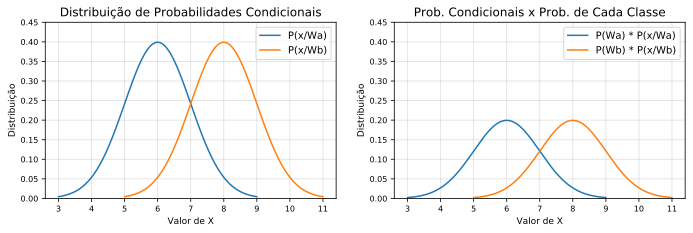

In [9]:
limitesY = [0, 0.45]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
ax1.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
ax1.set_title("Distribuição de Probabilidades Condicionais")
ax1.set_xlabel("Valor de X")
ax1.set_ylabel("Distribuição")
ax1.set_ylim(limitesY)
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
ax2.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
ax2.set_title("Prob. Condicionais x Prob. de Cada Classe")
ax2.set_xlabel("Valor de X")
ax2.set_ylabel("Distribuição")
ax2.set_ylim(limitesY)
ax2.legend()
ax2.grid(alpha=0.4)

Pelo método gráfico, verifica-se que o limite de decisão é 7. Abaixo desse valor, escolha a classe A, acima, a classe B.

#### Item C

In [10]:
# TOTAL DE SIMULACOES
totalAmostras = 1000

# COMO CADA CLASSE TEM 50% DE CHANCE DE APARECER, ENTAO SAO 500 AMOSTRAS PRA CADA
x = np.append(np.random.normal(mediapXWa, desvPadpXWa, int(totalAmostras * pWa)), np.random.normal(mediapXWb, desvPadpXWb, int(totalAmostras * pWb)))
y = np.append(np.full((int(totalAmostras * pWa)),1), np.full((int(totalAmostras * pWb)),2))

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, mediapXWa, desvPadpXWa, mediapXWb, desvPadpXWb, pWa, pWb)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.835
Taxa de Erros: 0.16500000000000004


## Questão 3

#### Itens A e B

In [11]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d2
desvPadpXWa = 1
mediapXWb   = d2
desvPadpXWb = 4

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.5
pWb = 0.5

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

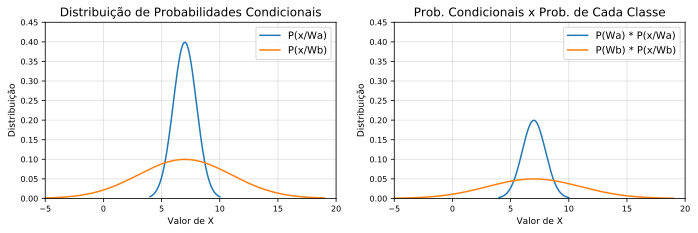

In [12]:
limitesX = [-5, 20]
limitesY = [0, 0.45]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
ax1.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
ax1.set_title("Distribuição de Probabilidades Condicionais")
ax1.set_xlabel("Valor de X")
ax1.set_ylabel("Distribuição")
ax1.set_xlim(limitesX)
ax1.set_ylim(limitesY)
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
ax2.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
ax2.set_title("Prob. Condicionais x Prob. de Cada Classe")
ax2.set_xlabel("Valor de X")
ax2.set_ylabel("Distribuição")
ax2.set_xlim(limitesX)
ax2.set_ylim(limitesY)
ax2.legend()
ax2.grid(alpha=0.4)

#### Item C

In [13]:
# TOTAL DE SIMULACOES
totalAmostras = 1000

# COMO CADA CLASSE TEM 50% DE CHANCE DE APARECER, ENTAO SAO 500 AMOSTRAS PRA CADA
x = np.append(np.random.normal(mediapXWa, desvPadpXWa, int(totalAmostras * pWa)), np.random.normal(mediapXWb, desvPadpXWb, int(totalAmostras * pWb)))
y = np.append(np.full((int(totalAmostras * pWa)),1), np.full((int(totalAmostras * pWb)),2))

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, mediapXWa, desvPadpXWa, mediapXWb, desvPadpXWb, pWa, pWb)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.745
Taxa de Erros: 0.255


## Questão 4

#### Item B

In [14]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d2
desvPadpXWa = 1
mediapXWb   = d2 + 3
desvPadpXWb = 1

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.99
pWb = 0.01

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

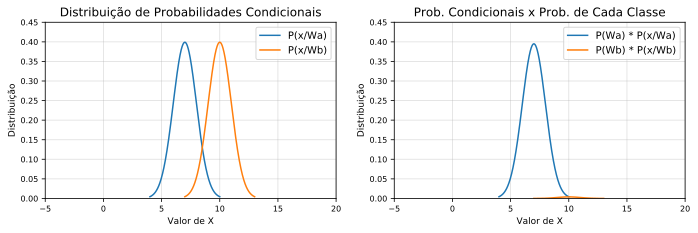

In [15]:
limitesX = [-5, 20]
limitesY = [0, 0.45]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
ax1.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
ax1.set_title("Distribuição de Probabilidades Condicionais")
ax1.set_xlabel("Valor de X")
ax1.set_ylabel("Distribuição")
ax1.set_xlim(limitesX)
ax1.set_ylim(limitesY)
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
ax2.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
ax2.set_title("Prob. Condicionais x Prob. de Cada Classe")
ax2.set_xlabel("Valor de X")
ax2.set_ylabel("Distribuição")
ax2.set_xlim(limitesX)
ax2.set_ylim(limitesY)
ax2.legend()
ax2.grid(alpha=0.4)

#### Classe 1: saudável
#### Classe 2: doente

In [16]:
# TOTAL DE SIMULACOES
totalAmostras = 10000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
x = np.append(np.random.normal(mediapXWa, desvPadpXWa, int(totalAmostras * pWa)), np.random.normal(mediapXWb, desvPadpXWb, int(totalAmostras * pWb)))
y = np.append(np.full((int(totalAmostras * pWa)),1), np.full((int(totalAmostras * pWb)),2))

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
TP = 0
TN = 0
FP = 0
FN = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, mediapXWa, desvPadpXWa, mediapXWb, desvPadpXWb, pWa, pWb)
    
    if classePredita == classeCorreta and classeCorreta == 2:
        # PESSOA DOENTE E EXAME POSITIVO
        TP += 1
    elif classePredita != classeCorreta and classeCorreta == 2:
        # PESSOA DOENTE E EXAME NEGATIVO
        FN += 1
    elif classePredita == classeCorreta and classeCorreta == 1:
        # PESSOA SAUDAVEL E EXAME NEGATIVO
        TN += 1
    else:
        # PESSOA SAUDAVEL E EXAME POSITIVO
        FP += 1
        
# CALCULO DAS METRICAS
acuracia        = (TP + TN) / (TP + TN + FP + FN)
mediaPrecisoes  = ((TP/(TP+FP)) + (TN/(FN+TN)))/2
mediaRevocacoes = ((TP/(TP+FN)) + (TN/(FP+TN)))/2

# PRINTS
print("Acurácia:", acuracia)
print("Taxa de Erros:", 1 - acuracia)
print("Precisão Média:", mediaPrecisoes)
print("Revocação Média:", mediaRevocacoes)

print("\nTABELA:")
print(FP, TP)
print(TN, FN)

Acurácia: 0.9928
Taxa de Erros: 0.007199999999999984
Precisão Média: 0.8869346733668342
Revocação Média: 0.6944444444444444

TABELA:
11 39
9889 61


## Questão 5

In [17]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [6, 4], 
          'axes.labelsize': 9,
          'axes.titlesize':12, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

### Item D (a)

Acurácia: 1.0
Total amostras: 1000
Erros: 0
Taxa de Erros: 0.0


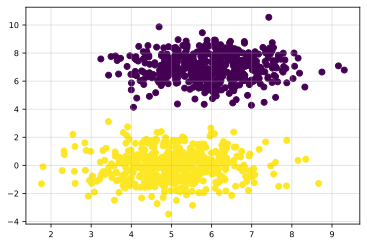

In [18]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# TOTAL DE SIMULACOES
totalAmostras = 1000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
xa = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
ya = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(xa[:,0], xa[:,1], c=ya)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xa, ya):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

### Item D (b)

Acurácia: 0.999
Total amostras: 1000
Erros: 1
Taxa de Erros: 0.0010000000000000009


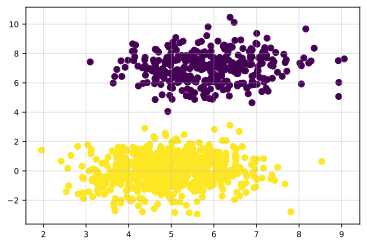

In [19]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 1/3
probClasseB = 2/3

# TOTAL DE SIMULACOES
totalAmostras = 1000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
xb = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
yb = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(xb[:,0], xb[:,1], c=yb)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xb, yb):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

### Item D (c)

Acurácia: 0.995
Total amostras: 1000
Erros: 5
Taxa de Erros: 0.0050000000000000044


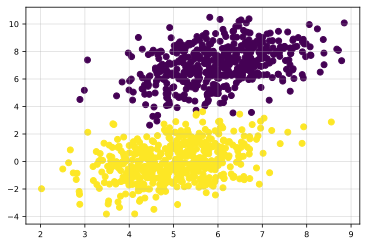

In [20]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0.5],[0.5,2]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0.5],[0.5,2]]
probClasseA = 0.5
probClasseB = 0.5

# TOTAL DE SIMULACOES
totalAmostras = 1000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
xc = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
yc = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(xc[:,0], xc[:,1], c=yc)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xc, yc):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

### Item E (b)

In [21]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xb, yb):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.999
Total amostras: 1000
Erros: 1
Taxa de Erros: 0.0010000000000000009


### Item E (c)

In [22]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xc, yc):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.994
Total amostras: 1000
Erros: 6
Taxa de Erros: 0.006000000000000005


## Questão 6

#### Item B

Acurácia: 0.988
Total amostras: 2000
Erros: 24
Taxa de Erros: 0.01200000000000001


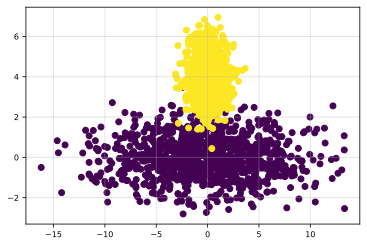

In [23]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [0, 0]
matrizCovarianciasClasseA = [[20+d1,0],[0,1]]
vetorMediasClasseB        = [0, 4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# TOTAL DE SIMULACOES
totalAmostras = 2000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
x = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
y = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(x[:,0], x[:,1], c=y)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

#### Item C

Classificador de menor distância. Na célula acima eu já criei o dataset, basta usar a distância como parâmetro, agora.

In [24]:
# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    
    distanciaCentroideA = distanciaEuclidiana(xAtual, vetorMediasClasseA)
    distanciaCentroideB = distanciaEuclidiana(xAtual, vetorMediasClasseB)
    
    classePredita = 1
    if distanciaCentroideB < distanciaCentroideA:
        classePredita = 2
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.977
Total amostras: 2000
Erros: 46
Taxa de Erros: 0.02300000000000002


## Questão 7

In [25]:
colunas    = ["feature1", "feature2", "classeCorreta"]

dataframe1 = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto1KNN/datasets/Parte_1/dataset1.txt", names=colunas)
dataframe2 = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto1KNN/datasets/Parte_1/dataset2.txt", names=colunas)
dataframe3 = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto1KNN/datasets/Parte_1/dataset3.txt", names=colunas)
dataframe4 = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto1KNN/datasets/Parte_1/dataset4.txt", names=colunas)
dataframe5 = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto1KNN/datasets/Parte_1/dataset5.txt", names=colunas)
dataframe6 = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto1KNN/datasets/Parte_1/dataset6.txt", names=colunas)

In [45]:
matrizResultadosLDA = []
matrizResultadosQDA = []

Vou usar as implementações do SK Learn também para fazer comparações.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#### Dataset 1

In [46]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe1[["feature1", "feature2"]].values
y = dataframe1["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDAProprio = []
arrayAcuraciasQDAProprio = []
arrayAcuraciasLDASKLearn = []
arrayAcuraciasQDASKLearn = []

for i in range(10):
    
    # HOLDOUT
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)
    
    # JA VOU PEGAR OS RESULTADOS DO SKLEARN ANTES DE SEGUIR COM A MINHA IMPLEMENTACAO
    objLDA   = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
    objQDA   = QuadraticDiscriminantAnalysis().fit(xTrain, yTrain)    
    yPredLDA = objLDA.predict(xTest)
    yPredQDA = objQDA.predict(xTest)    
    arrayAcuraciasLDASKLearn.append(accuracy_score(yTest, yPredLDA))
    arrayAcuraciasQDASKLearn.append(accuracy_score(yTest, yPredQDA))
    
    # AGORA VEM A MINHA IMPLEMENTACAO
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0) # lda e qda
    matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T) # qda apenas
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain) # lda e qda
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0) # lda e qda
    matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T) # qda apenas
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain) # lda e qda
    matrizCovarianciasGeral   = np.cov(xTrain.T) # lda apenas
    
    # PREDIZENDO
    acertosLDA = 0
    acertosQDA = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePreditaLDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB)
        classePreditaQDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)

        if classePreditaLDA == classeCorreta:
            acertosLDA += 1
        if classePreditaQDA == classeCorreta:
            acertosQDA += 1

    # CALCULO A ACURACIA
    acuraciaAtualLDA = acertosLDA / len(xTest)
    acuraciaAtualQDA = acertosQDA / len(xTest)
    arrayAcuraciasLDAProprio.append(acuraciaAtualLDA)
    arrayAcuraciasQDAProprio.append(acuraciaAtualQDA)
    
print("Acurácia LDA Próprio:", np.mean(arrayAcuraciasLDAProprio), "+-", np.std(arrayAcuraciasLDAProprio))
print("Acurácia LDA SKLearn:", np.mean(arrayAcuraciasLDASKLearn), "+-", np.std(arrayAcuraciasLDASKLearn))
print("Acurácia QDA Próprio:", np.mean(arrayAcuraciasQDAProprio), "+-", np.std(arrayAcuraciasQDAProprio))
print("Acurácia QDA SKLearn:", np.mean(arrayAcuraciasQDASKLearn), "+-", np.std(arrayAcuraciasQDASKLearn))

matrizResultadosLDA.append(["Dataset 1", np.mean(arrayAcuraciasLDAProprio), np.std(arrayAcuraciasLDAProprio), np.mean(arrayAcuraciasLDASKLearn), np.std(arrayAcuraciasLDASKLearn)])
matrizResultadosQDA.append(["Dataset 1", np.mean(arrayAcuraciasQDAProprio), np.std(arrayAcuraciasQDAProprio), np.mean(arrayAcuraciasQDASKLearn), np.std(arrayAcuraciasQDASKLearn)])

Acurácia LDA Próprio: 1.0 +- 0.0
Acurácia LDA SKLearn: 1.0 +- 0.0
Acurácia QDA Próprio: 1.0 +- 0.0
Acurácia QDA SKLearn: 1.0 +- 0.0


#### Dataset 2

In [47]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe2[["feature1", "feature2"]].values
y = dataframe2["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDAProprio = []
arrayAcuraciasQDAProprio = []
arrayAcuraciasLDASKLearn = []
arrayAcuraciasQDASKLearn = []

for i in range(10):
    
    # HOLDOUT
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)
    
    # JA VOU PEGAR OS RESULTADOS DO SKLEARN ANTES DE SEGUIR COM A MINHA IMPLEMENTACAO
    objLDA   = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
    objQDA   = QuadraticDiscriminantAnalysis().fit(xTrain, yTrain)    
    yPredLDA = objLDA.predict(xTest)
    yPredQDA = objQDA.predict(xTest)    
    arrayAcuraciasLDASKLearn.append(accuracy_score(yTest, yPredLDA))
    arrayAcuraciasQDASKLearn.append(accuracy_score(yTest, yPredQDA))
    
    # AGORA VEM A MINHA IMPLEMENTACAO
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0) # lda e qda
    matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T) # qda apenas
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain) # lda e qda
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0) # lda e qda
    matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T) # qda apenas
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain) # lda e qda
    matrizCovarianciasGeral   = np.cov(xTrain.T) # lda apenas
    
    # PREDIZENDO
    acertosLDA = 0
    acertosQDA = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePreditaLDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB)
        classePreditaQDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)

        if classePreditaLDA == classeCorreta:
            acertosLDA += 1
        if classePreditaQDA == classeCorreta:
            acertosQDA += 1

    # CALCULO A ACURACIA
    acuraciaAtualLDA = acertosLDA / len(xTest)
    acuraciaAtualQDA = acertosQDA / len(xTest)
    arrayAcuraciasLDAProprio.append(acuraciaAtualLDA)
    arrayAcuraciasQDAProprio.append(acuraciaAtualQDA)
    
print("Acurácia LDA Próprio:", np.mean(arrayAcuraciasLDAProprio), "+-", np.std(arrayAcuraciasLDAProprio))
print("Acurácia LDA SKLearn:", np.mean(arrayAcuraciasLDASKLearn), "+-", np.std(arrayAcuraciasLDASKLearn))
print("Acurácia QDA Próprio:", np.mean(arrayAcuraciasQDAProprio), "+-", np.std(arrayAcuraciasQDAProprio))
print("Acurácia QDA SKLearn:", np.mean(arrayAcuraciasQDASKLearn), "+-", np.std(arrayAcuraciasQDASKLearn))

matrizResultadosLDA.append(["Dataset 2", np.mean(arrayAcuraciasLDAProprio), np.std(arrayAcuraciasLDAProprio), np.mean(arrayAcuraciasLDASKLearn), np.std(arrayAcuraciasLDASKLearn)])
matrizResultadosQDA.append(["Dataset 2", np.mean(arrayAcuraciasQDAProprio), np.std(arrayAcuraciasQDAProprio), np.mean(arrayAcuraciasQDASKLearn), np.std(arrayAcuraciasQDASKLearn)])

Acurácia LDA Próprio: 0.7428571428571428 +- 0.08571428571428569
Acurácia LDA SKLearn: 0.7142857142857142 +- 0.12777531299998798
Acurácia QDA Próprio: 0.7142857142857142 +- 0.12777531299998798
Acurácia QDA SKLearn: 0.7142857142857142 +- 0.12777531299998798


#### Dataset 3

In [48]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe3[["feature1", "feature2"]].values
y = dataframe3["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDAProprio = []
arrayAcuraciasQDAProprio = []
arrayAcuraciasLDASKLearn = []
arrayAcuraciasQDASKLearn = []

for i in range(10):
    
    # HOLDOUT
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)
    
    # JA VOU PEGAR OS RESULTADOS DO SKLEARN ANTES DE SEGUIR COM A MINHA IMPLEMENTACAO
    objLDA   = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
    objQDA   = QuadraticDiscriminantAnalysis().fit(xTrain, yTrain)    
    yPredLDA = objLDA.predict(xTest)
    yPredQDA = objQDA.predict(xTest)    
    arrayAcuraciasLDASKLearn.append(accuracy_score(yTest, yPredLDA))
    arrayAcuraciasQDASKLearn.append(accuracy_score(yTest, yPredQDA))
    
    # AGORA VEM A MINHA IMPLEMENTACAO
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0) # lda e qda
    matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T) # qda apenas
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain) # lda e qda
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0) # lda e qda
    matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T) # qda apenas
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain) # lda e qda
    matrizCovarianciasGeral   = np.cov(xTrain.T) # lda apenas
    
    # PREDIZENDO
    acertosLDA = 0
    acertosQDA = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePreditaLDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB)
        classePreditaQDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)

        if classePreditaLDA == classeCorreta:
            acertosLDA += 1
        if classePreditaQDA == classeCorreta:
            acertosQDA += 1

    # CALCULO A ACURACIA
    acuraciaAtualLDA = acertosLDA / len(xTest)
    acuraciaAtualQDA = acertosQDA / len(xTest)
    arrayAcuraciasLDAProprio.append(acuraciaAtualLDA)
    arrayAcuraciasQDAProprio.append(acuraciaAtualQDA)
    
print("Acurácia LDA Próprio:", np.mean(arrayAcuraciasLDAProprio), "+-", np.std(arrayAcuraciasLDAProprio))
print("Acurácia LDA SKLearn:", np.mean(arrayAcuraciasLDASKLearn), "+-", np.std(arrayAcuraciasLDASKLearn))
print("Acurácia QDA Próprio:", np.mean(arrayAcuraciasQDAProprio), "+-", np.std(arrayAcuraciasQDAProprio))
print("Acurácia QDA SKLearn:", np.mean(arrayAcuraciasQDASKLearn), "+-", np.std(arrayAcuraciasQDASKLearn))

matrizResultadosLDA.append(["Dataset 3", np.mean(arrayAcuraciasLDAProprio), np.std(arrayAcuraciasLDAProprio), np.mean(arrayAcuraciasLDASKLearn), np.std(arrayAcuraciasLDASKLearn)])
matrizResultadosQDA.append(["Dataset 3", np.mean(arrayAcuraciasQDAProprio), np.std(arrayAcuraciasQDAProprio), np.mean(arrayAcuraciasQDASKLearn), np.std(arrayAcuraciasQDASKLearn)])

Acurácia LDA Próprio: 0.42600000000000005 +- 0.1016070863670443
Acurácia LDA SKLearn: 0.42600000000000005 +- 0.1016070863670443
Acurácia QDA Próprio: 0.8380000000000001 +- 0.03944616584663204
Acurácia QDA SKLearn: 0.8380000000000001 +- 0.03944616584663204


#### Dataset 4

In [49]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe4[["feature1", "feature2"]].values
y = dataframe4["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDAProprio = []
arrayAcuraciasQDAProprio = []
arrayAcuraciasLDASKLearn = []
arrayAcuraciasQDASKLearn = []

for i in range(10):
    
    # HOLDOUT
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)
    
    # JA VOU PEGAR OS RESULTADOS DO SKLEARN ANTES DE SEGUIR COM A MINHA IMPLEMENTACAO
    objLDA   = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
    objQDA   = QuadraticDiscriminantAnalysis().fit(xTrain, yTrain)    
    yPredLDA = objLDA.predict(xTest)
    yPredQDA = objQDA.predict(xTest)    
    arrayAcuraciasLDASKLearn.append(accuracy_score(yTest, yPredLDA))
    arrayAcuraciasQDASKLearn.append(accuracy_score(yTest, yPredQDA))
    
    # AGORA VEM A MINHA IMPLEMENTACAO
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0) # lda e qda
    matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T) # qda apenas
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain) # lda e qda
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0) # lda e qda
    matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T) # qda apenas
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain) # lda e qda
    matrizCovarianciasGeral   = np.cov(xTrain.T) # lda apenas
    
    # PREDIZENDO
    acertosLDA = 0
    acertosQDA = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePreditaLDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB)
        classePreditaQDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)

        if classePreditaLDA == classeCorreta:
            acertosLDA += 1
        if classePreditaQDA == classeCorreta:
            acertosQDA += 1

    # CALCULO A ACURACIA
    acuraciaAtualLDA = acertosLDA / len(xTest)
    acuraciaAtualQDA = acertosQDA / len(xTest)
    arrayAcuraciasLDAProprio.append(acuraciaAtualLDA)
    arrayAcuraciasQDAProprio.append(acuraciaAtualQDA)
    
print("Acurácia LDA Próprio:", np.mean(arrayAcuraciasLDAProprio), "+-", np.std(arrayAcuraciasLDAProprio))
print("Acurácia LDA SKLearn:", np.mean(arrayAcuraciasLDASKLearn), "+-", np.std(arrayAcuraciasLDASKLearn))
print("Acurácia QDA Próprio:", np.mean(arrayAcuraciasQDAProprio), "+-", np.std(arrayAcuraciasQDAProprio))
print("Acurácia QDA SKLearn:", np.mean(arrayAcuraciasQDASKLearn), "+-", np.std(arrayAcuraciasQDASKLearn))

matrizResultadosLDA.append(["Dataset 4", np.mean(arrayAcuraciasLDAProprio), np.std(arrayAcuraciasLDAProprio), np.mean(arrayAcuraciasLDASKLearn), np.std(arrayAcuraciasLDASKLearn)])
matrizResultadosQDA.append(["Dataset 4", np.mean(arrayAcuraciasQDAProprio), np.std(arrayAcuraciasQDAProprio), np.mean(arrayAcuraciasQDASKLearn), np.std(arrayAcuraciasQDASKLearn)])

Acurácia LDA Próprio: 0.7757575757575758 +- 0.049236596391733105
Acurácia LDA SKLearn: 0.7757575757575758 +- 0.049236596391733105
Acurácia QDA Próprio: 0.793939393939394 +- 0.05034317492677621
Acurácia QDA SKLearn: 0.793939393939394 +- 0.05034317492677621


#### Dataset 5

In [50]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe5[["feature1", "feature2"]].values
y = dataframe5["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDAProprio = []
arrayAcuraciasQDAProprio = []
arrayAcuraciasLDASKLearn = []
arrayAcuraciasQDASKLearn = []

for i in range(10):
    
    # HOLDOUT
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)
    
    # JA VOU PEGAR OS RESULTADOS DO SKLEARN ANTES DE SEGUIR COM A MINHA IMPLEMENTACAO
    objLDA   = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
    objQDA   = QuadraticDiscriminantAnalysis().fit(xTrain, yTrain)    
    yPredLDA = objLDA.predict(xTest)
    yPredQDA = objQDA.predict(xTest)    
    arrayAcuraciasLDASKLearn.append(accuracy_score(yTest, yPredLDA))
    arrayAcuraciasQDASKLearn.append(accuracy_score(yTest, yPredQDA))
    
    # AGORA VEM A MINHA IMPLEMENTACAO
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    dadosTreinoClasseC = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 3])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0) # lda e qda
    matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T) # qda apenas
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain) # lda e qda
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0) # lda e qda
    matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T) # qda apenas
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain) # lda e qda
    vetorMediasClasseC        = np.mean(dadosTreinoClasseC, axis=0)
    matrizCovarianciasClasseC = np.cov(dadosTreinoClasseC.T)
    probClasseC               = len(dadosTreinoClasseC)/len(xTrain)
    matrizCovarianciasGeral   = np.cov(xTrain.T) # lda apenas
    
    # PREDIZENDO
    acertosLDA = 0
    acertosQDA = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePreditaLDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB, vetorMediasClasseC, matrizCovarianciasGeral, probClasseC)
        classePreditaQDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB, vetorMediasClasseC, matrizCovarianciasClasseC, probClasseC)

        if classePreditaLDA == classeCorreta:
            acertosLDA += 1
        if classePreditaQDA == classeCorreta:
            acertosQDA += 1

    # CALCULO A ACURACIA
    acuraciaAtualLDA = acertosLDA / len(xTest)
    acuraciaAtualQDA = acertosQDA / len(xTest)
    arrayAcuraciasLDAProprio.append(acuraciaAtualLDA)
    arrayAcuraciasQDAProprio.append(acuraciaAtualQDA)
    
print("Acurácia LDA Próprio:", np.mean(arrayAcuraciasLDAProprio), "+-", np.std(arrayAcuraciasLDAProprio))
print("Acurácia LDA SKLearn:", np.mean(arrayAcuraciasLDASKLearn), "+-", np.std(arrayAcuraciasLDASKLearn))
print("Acurácia QDA Próprio:", np.mean(arrayAcuraciasQDAProprio), "+-", np.std(arrayAcuraciasQDAProprio))
print("Acurácia QDA SKLearn:", np.mean(arrayAcuraciasQDASKLearn), "+-", np.std(arrayAcuraciasQDASKLearn))

matrizResultadosLDA.append(["Dataset 5", np.mean(arrayAcuraciasLDAProprio), np.std(arrayAcuraciasLDAProprio), np.mean(arrayAcuraciasLDASKLearn), np.std(arrayAcuraciasLDASKLearn)])
matrizResultadosQDA.append(["Dataset 5", np.mean(arrayAcuraciasQDAProprio), np.std(arrayAcuraciasQDAProprio), np.mean(arrayAcuraciasQDASKLearn), np.std(arrayAcuraciasQDASKLearn)])

Acurácia LDA Próprio: 0.994736842105263 +- 0.010526315789473672
Acurácia LDA SKLearn: 0.9921052631578947 +- 0.012059409723567987
Acurácia QDA Próprio: 0.9894736842105262 +- 0.017455919949238955
Acurácia QDA SKLearn: 0.9894736842105262 +- 0.017455919949238955


#### Dataset 6

In [51]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe6[["feature1", "feature2"]].values
y = dataframe6["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDAProprio = []
arrayAcuraciasQDAProprio = []
arrayAcuraciasLDASKLearn = []
arrayAcuraciasQDASKLearn = []

for i in range(10):
    
    # HOLDOUT
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)
    
    # JA VOU PEGAR OS RESULTADOS DO SKLEARN ANTES DE SEGUIR COM A MINHA IMPLEMENTACAO
    objLDA   = LinearDiscriminantAnalysis().fit(xTrain, yTrain)
    objQDA   = QuadraticDiscriminantAnalysis().fit(xTrain, yTrain)    
    yPredLDA = objLDA.predict(xTest)
    yPredQDA = objQDA.predict(xTest)    
    arrayAcuraciasLDASKLearn.append(accuracy_score(yTest, yPredLDA))
    arrayAcuraciasQDASKLearn.append(accuracy_score(yTest, yPredQDA))
    
    # AGORA VEM A MINHA IMPLEMENTACAO
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    dadosTreinoClasseC = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 3])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0) # lda e qda
    matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T) # qda apenas
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain) # lda e qda
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0) # lda e qda
    matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T) # qda apenas
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain) # lda e qda
    vetorMediasClasseC        = np.mean(dadosTreinoClasseC, axis=0)
    matrizCovarianciasClasseC = np.cov(dadosTreinoClasseC.T)
    probClasseC               = len(dadosTreinoClasseC)/len(xTrain)
    matrizCovarianciasGeral   = np.cov(xTrain.T) # lda apenas
    
    # PREDIZENDO
    acertosLDA = 0
    acertosQDA = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePreditaLDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB, vetorMediasClasseC, matrizCovarianciasGeral, probClasseC)
        classePreditaQDA = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB, vetorMediasClasseC, matrizCovarianciasClasseC, probClasseC)

        if classePreditaLDA == classeCorreta:
            acertosLDA += 1
        if classePreditaQDA == classeCorreta:
            acertosQDA += 1

    # CALCULO A ACURACIA
    acuraciaAtualLDA = acertosLDA / len(xTest)
    acuraciaAtualQDA = acertosQDA / len(xTest)
    arrayAcuraciasLDAProprio.append(acuraciaAtualLDA)
    arrayAcuraciasQDAProprio.append(acuraciaAtualQDA)
    
print("Acurácia LDA Próprio:", np.mean(arrayAcuraciasLDAProprio), "+-", np.std(arrayAcuraciasLDAProprio))
print("Acurácia LDA SKLearn:", np.mean(arrayAcuraciasLDASKLearn), "+-", np.std(arrayAcuraciasLDASKLearn))
print("Acurácia QDA Próprio:", np.mean(arrayAcuraciasQDAProprio), "+-", np.std(arrayAcuraciasQDAProprio))
print("Acurácia QDA SKLearn:", np.mean(arrayAcuraciasQDASKLearn), "+-", np.std(arrayAcuraciasQDASKLearn))

matrizResultadosLDA.append(["Dataset 6", np.mean(arrayAcuraciasLDAProprio), np.std(arrayAcuraciasLDAProprio), np.mean(arrayAcuraciasLDASKLearn), np.std(arrayAcuraciasLDASKLearn)])
matrizResultadosQDA.append(["Dataset 6", np.mean(arrayAcuraciasQDAProprio), np.std(arrayAcuraciasQDAProprio), np.mean(arrayAcuraciasQDASKLearn), np.std(arrayAcuraciasQDASKLearn)])

Acurácia LDA Próprio: 0.7894736842105262 +- 0.06227452403262754
Acurácia LDA SKLearn: 0.8 +- 0.050207326390365556
Acurácia QDA Próprio: 0.7868421052631579 +- 0.058193011546042055
Acurácia QDA SKLearn: 0.7868421052631579 +- 0.058193011546042055


#### Resumo LDA

In [57]:
print("Resultados para o LDA:")
dataframeResumoLDA = pd.DataFrame(data=matrizResultadosLDA, columns=["Dataset", "Acurácia", "Desvio Padrão", "Acurácia (SK Learn)", "Desvio Padrão (Sk Learn)"])
dataframeResumoLDA.style.hide_index()

Resultados para o LDA:


Dataset,Acurácia,Desvio Padrão,Acurácia (SK Learn),Desvio Padrão (Sk Learn)
Dataset 1,1.000000,0.000000,1.000000,0.000000
Dataset 2,0.742857,0.085714,0.714286,0.127775
Dataset 3,0.426000,0.101607,0.426000,0.101607
Dataset 4,0.775758,0.049237,0.775758,0.049237
Dataset 5,0.994737,0.010526,0.992105,0.012059
Dataset 6,0.789474,0.062275,0.800000,0.050207


#### Resumo QDA

In [58]:
print("Resultados para o QDA:")
dataframeResumoLDA = pd.DataFrame(data=matrizResultadosQDA, columns=["Dataset", "Acurácia", "Desvio Padrão", "Acurácia (SK Learn)", "Desvio Padrão (Sk Learn)"])
dataframeResumoLDA.style.hide_index()

Resultados para o QDA:


Dataset,Acurácia,Desvio Padrão,Acurácia (SK Learn),Desvio Padrão (Sk Learn)
Dataset 1,1.000000,0.000000,1.000000,0.000000
Dataset 2,0.714286,0.127775,0.714286,0.127775
Dataset 3,0.838000,0.039446,0.838000,0.039446
Dataset 4,0.793939,0.050343,0.793939,0.050343
Dataset 5,0.989474,0.017456,0.989474,0.017456
Dataset 6,0.786842,0.058193,0.786842,0.058193


## Questão 8

#### Item A

In [101]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe2[["feature1", "feature2"]].values
y = dataframe2["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDA = []
for i in range(100):
    
    # HOLDOUT -> 5 VETORES PARA TREINAMENTO
    percentualTeste = (len(x) - 5)/len(x)
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=percentualTeste, shuffle=True)
    
    # PRINTANDO
    #plt.scatter(xTrain[:,0], xTrain[:,1], c=yTrain)
    #plt.scatter(xTest[:,0], xTest[:,1], color="#cccccc")
    #plt.grid(alpha=0.4)
    #plt.show()
    
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    
    # VERIFICANDO SE TEM DADO DAS DUAS CLASSES PRA TESTAR, SE NAO TIVER NAO TEM COMO TREINAR
    if len(dadosTreinoClasseA) == 0 or len(dadosTreinoClasseB) == 0:
        continue
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0)
    #matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T)
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain)
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0)
    #matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T)
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain)
    matrizCovarianciasGeral   = np.cov(xTrain.T)
    
    # PREDIZENDO
    acertos = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB)

        if classePredita == classeCorreta:
            acertos += 1

    # CALCULO A ACURACIA
    acuraciaAtual = acertos / len(xTest)
    arrayAcuraciasLDA.append(acuraciaAtual)
    
print("Acurácia:", np.mean(arrayAcuraciasLDA), "+-", np.std(arrayAcuraciasLDA))
matrizResultadosLDA.append(["Dataset 2", np.mean(arrayAcuraciasLDA), np.std(arrayAcuraciasLDA)])

Acurácia: 0.6602150537634409 +- 0.109387134297084


#### Item B

In [107]:
# CRIANDO OS ARRAYS DE DADOS E CLASSIFICACAO CORRETA
x = dataframe2[["feature1", "feature2"]].values
y = dataframe2["classeCorreta"].values

# BOOTSTRAP
arrayAcuraciasLDA = []
for i in range(100):
    
    # HOLDOUT -> 20 VETORES PARA TREINAMENTO
    percentualTeste = (len(x)-20)/len(x)
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=percentualTeste, shuffle=True)
    
    # PRINTANDO
    #plt.scatter(xTrain[:,0], xTrain[:,1], c=yTrain)
    #plt.scatter(xTest[:,0], xTest[:,1], color="#cccccc")
    #plt.grid(alpha=0.4)
    #plt.show()
    
    # SEPARANDO O QUE E DE CADA CLASSE PRA DEPOIS TIRAR A MEDIA E AS COVARIANCIAS
    dadosTreinoClasseA = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 1])
    dadosTreinoClasseB = np.array([dadoAtual for j, dadoAtual in enumerate(xTrain) if yTrain[j] == 2])
    
    # USANDO OS DADOS DE TREINAMENTO PARA DEFINIR AS MEDIAS, MATRIZES DE COVARIANCIA E PROB CLASSES
    vetorMediasClasseA        = np.mean(dadosTreinoClasseA, axis=0)
    #matrizCovarianciasClasseA = np.cov(dadosTreinoClasseA.T)
    probClasseA               = len(dadosTreinoClasseA)/len(xTrain)
    vetorMediasClasseB        = np.mean(dadosTreinoClasseB, axis=0)
    #matrizCovarianciasClasseB = np.cov(dadosTreinoClasseB.T)
    probClasseB               = len(dadosTreinoClasseB)/len(xTrain)
    matrizCovarianciasGeral   = np.cov(xTrain.T)
    
#     print("vetorMediasClasseA:", vetorMediasClasseA)
#     print("matrizCovarianciasClasseA:", matrizCovarianciasClasseA)
#     print("probClasseA:", probClasseA)
#     print("vetorMediasClasseB:", vetorMediasClasseB)
#     print("matrizCovarianciasClasseB:", matrizCovarianciasClasseB)
#     print("probClasseB:", probClasseB)
    
    # PREDIZENDO
    acertos = 0
    
    for xAtual, classeCorreta in zip(xTest, yTest):
        classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasGeral, vetorMediasClasseB, matrizCovarianciasGeral, probClasseA, probClasseB)

        if classePredita == classeCorreta:
            acertos += 1

    # CALCULO A ACURACIA
    acuraciaAtual = acertos / len(xTest)
    arrayAcuraciasLDA.append(acuraciaAtual)
    
print("Acurácia:", np.mean(arrayAcuraciasLDA), "+-", np.std(arrayAcuraciasLDA))
matrizResultadosLDA.append(["Dataset 2", np.mean(arrayAcuraciasLDA), np.std(arrayAcuraciasLDA)])

Acurácia: 0.76 +- 0.18330302779823357
